In [17]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures,StandardScaler 

from sklearn.metrics import r2_score 
from sklearn.pipeline import Pipeline

In [18]:
X=6* np.random.rand(200,1)- 3 
y=0.5*X**2 + 0.9*X+2  + np.random.randn(200,1)

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=32)

In [20]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
r2_score(y_test,y_pred)

0.45039451769978156

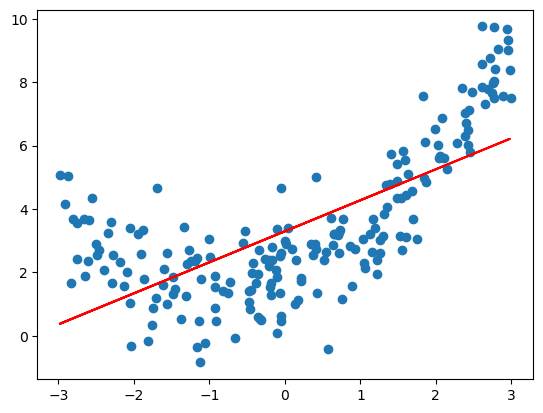

In [21]:
plt.scatter(X,y)
plt.plot(X_train,lr.predict(X_train),color='red')

In [6]:
#  applying polynomial linear regression 
poly=PolynomialFeatures(degree=3)

X_train_trans=poly.fit_transform(X_train)
X_test_trans=poly.transform(X_test)

In [7]:
print(X_train[0])
print(X_train_trans[0])

[-0.56625113]
[ 1.         -0.56625113  0.32064035 -0.18156296]


In [8]:
# including the bias paramter 

lr.fit(X_train_trans,y_train)
y_pred=lr.predict(X_test_trans)

r2_score(y_test,y_pred)

0.7139968563345802

In [9]:
lr.coef_

array([[ 0.        ,  0.90078816,  0.51431252, -0.00123451]])

In [10]:
X_new=np.linspace(-3,3,200).reshape(200,1)
X_new_poly=poly.transform(X_new)
y_new=lr.predict(X_new_poly)

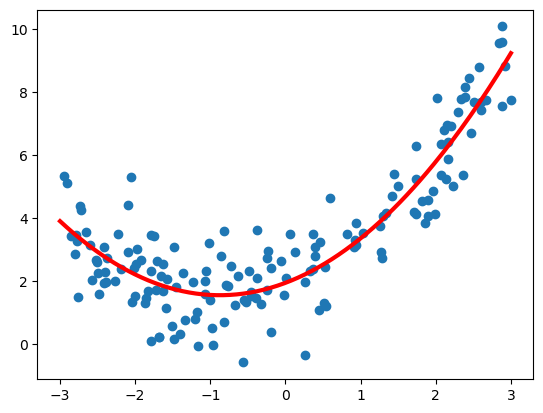

In [11]:
plt.plot(X_new,y_new,"r-",linewidth=3,label="prediction")
# plt.plot(X_train,y_train,"b.")
# plt.plot(X_test,y_test,"g.")
plt.scatter(X_train,y_train)